In [8]:
import matplotlib.pyplot as plt
from climakitae.core.data_interface import (
    get_data,
)
from renewable_data_load import *

In [2]:
resource = "pv"
module = "utility"
domain = "d03"
variable = "cf"
frequency = "day"
simulation = "all"
simulation = "ec-earth3"
scenario = "historical"

wrf_var = "Precipitation (total)"
wrf_simulation = sim_name_dict[simulation]
wrf_scenario = scenario_dict[scenario]
wrf_resolution = resolution_dict[domain]

wrfdat = get_data(
    variable=wrf_var,
    downscaling_method="Dynamical",
    resolution=wrf_resolution,
    timescale="daily",
    scenario=["Historical Climate", "SSP 3-7.0"],
)
wrfdat = wrfdat.sel(simulation=wrf_simulation)

/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:548: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  all_hist = xr.concat(
/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:589: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  one_scenario = xr.concat

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Returned data array is huge. Operations could take 10x to infinity longer than 1GB of data !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



In [3]:
WRF_sim_name = sim_name_dict[simulation]
model = WRF_sim_name.split("_")[1]
ensemble_member = WRF_sim_name.split("_")[2]
gwl = 0.8

start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl)
print(f"{simulation} {gwl}C: {start_year}-{end_year}")
# select data for gwl period
gwl_subset = wrfdat.sel(time=slice(f"{start_year}", f"{end_year}"))
gwl_subset = gwl_subset.expand_dims({"warming_level": [gwl]})

ec-earth3 0.8C: 1988-2017


In [4]:
wrf_var = "Precipitation (total)"
wrfdat_gwl = get_data(
    variable=wrf_var,
    downscaling_method="Dynamical",
    resolution=wrf_resolution,
    timescale="daily",
    approach="warming level",
    warming_level=[0.8],
)

/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:548: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  all_hist = xr.concat(
/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/climakitae/core/data_load.py:589: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'time' ('time',) The recommendation is to set join explicitly for this case.
  one_scenario = xr.concat

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Returned data array is huge. Operations could take 10x to infinity longer than 1GB of data !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



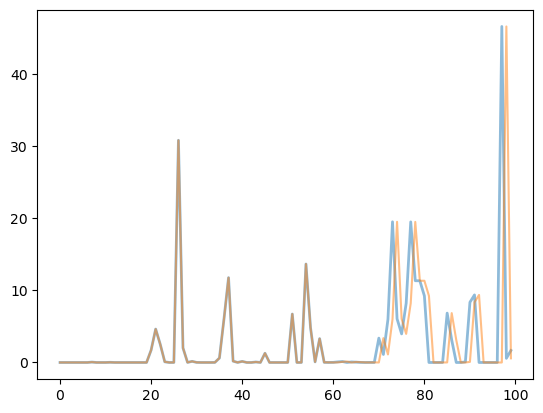

In [7]:
plt.plot(
    wrfdat_gwl.sel(simulation="WRF_EC-Earth3_r1i1p1f1_historical+ssp370")
    .isel(time_delta=slice(0, 100), x=200, y=250)
    .squeeze()
    .values,
    alpha=0.5,
    linewidth=2,
)
plt.plot(gwl_subset.isel(time=slice(0, 100), x=200, y=250).squeeze().values, alpha=0.5)

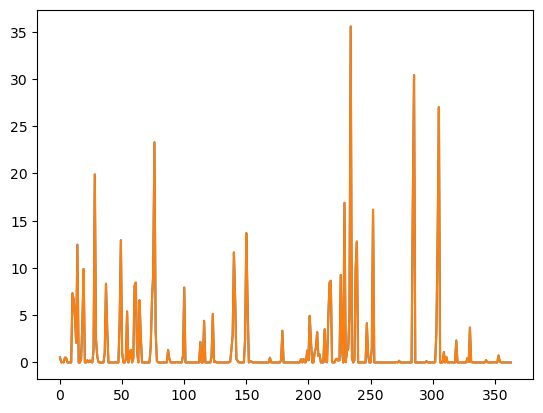

In [6]:
plt.plot(
    wrfdat_gwl.sel(simulation="WRF_EC-Earth3_r1i1p1f1_historical+ssp370")
    .isel(time_delta=slice(-365, -1), x=200, y=250)
    .squeeze()
    .values
)
plt.plot(gwl_subset.isel(time=slice(-365, -1), x=200, y=250).squeeze().values)